<a href="https://colab.research.google.com/github/ZORICA75019/co2-data/blob/master/Copie_de_Temperature_mondiale_ZT_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importation du fichier
df_temperature = pd.read_csv('Temperature_mondiale.csv')
df_temperature.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-0.14,-0.23,-0.21,-0.18,-0.17,***,***,-0.12,-0.16,-0.19
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.04,-0.15,-0.22,-0.19,-0.07,-0.09,-.10,-.17,0.05,-0.08,-0.19
2,1882,0.16,0.14,0.05,-0.17,-0.14,-0.23,-0.16,-0.07,-0.14,-0.23,-0.16,-0.35,-0.11,-.09,.08,-0.09,-0.15,-0.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.17,-0.08,-0.06,-0.14,-0.21,-0.11,-0.23,-0.11,-0.17,-.19,-.34,-0.16,-0.09,-0.18
4,1884,-0.13,-0.07,-0.36,-0.40,-0.34,-0.36,-0.30,-0.27,-0.27,-0.25,-0.33,-0.30,-0.28,-.27,-.10,-0.37,-0.31,-0.28


In [ ]:
# Détecter les valeurs manquantes dans chaque colonne

valeurs_manquantes_par_colonne = df_temperature.isnull().sum()
print(valeurs_manquantes_par_colonne)

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     0
J-D     0
D-N     0
DJF     0
MAM     0
JJA     0
SON     0
dtype: int64


In [ ]:
# remplacer les ***
df_temperature.replace('***', pd.NA, inplace=True)
numeric_cols = df_temperature.columns[1:]
df_temperature[numeric_cols] = df_temperature[numeric_cols].apply(pd.to_numeric, errors='coerce')
print(df_temperature)


     Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0    1880 -0.19 -0.24 -0.09 -0.16 -0.10 -0.21 -0.18 -0.10 -0.14 -0.23 -0.21   
1    1881 -0.20 -0.14  0.03  0.05  0.06 -0.19  0.00 -0.04 -0.15 -0.22 -0.19   
2    1882  0.16  0.14  0.05 -0.17 -0.14 -0.23 -0.16 -0.07 -0.14 -0.23 -0.16   
3    1883 -0.29 -0.37 -0.12 -0.18 -0.17 -0.08 -0.06 -0.14 -0.21 -0.11 -0.23   
4    1884 -0.13 -0.07 -0.36 -0.40 -0.34 -0.36 -0.30 -0.27 -0.27 -0.25 -0.33   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
139  2019  0.93  0.95  1.17  1.01  0.85  0.90  0.94  0.95  0.92  1.00  0.99   
140  2020  1.17  1.24  1.17  1.13  1.01  0.92  0.90  0.87  0.98  0.88  1.10   
141  2021  0.81  0.64  0.89  0.75  0.78  0.84  0.92  0.82  0.92  1.00  0.94   
142  2022  0.91  0.89  1.05  0.84  0.84  0.92  0.94  0.95  0.89  0.96  0.72   
143  2023  0.87  0.98  1.20  1.00  0.94  1.08  1.19  1.19  1.48  1.34  1.43   

      Dec   J-D   D-N   DJF   MAM   JJA   SON  
0  

C:\Users\ztodorovic\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ztodorovic\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


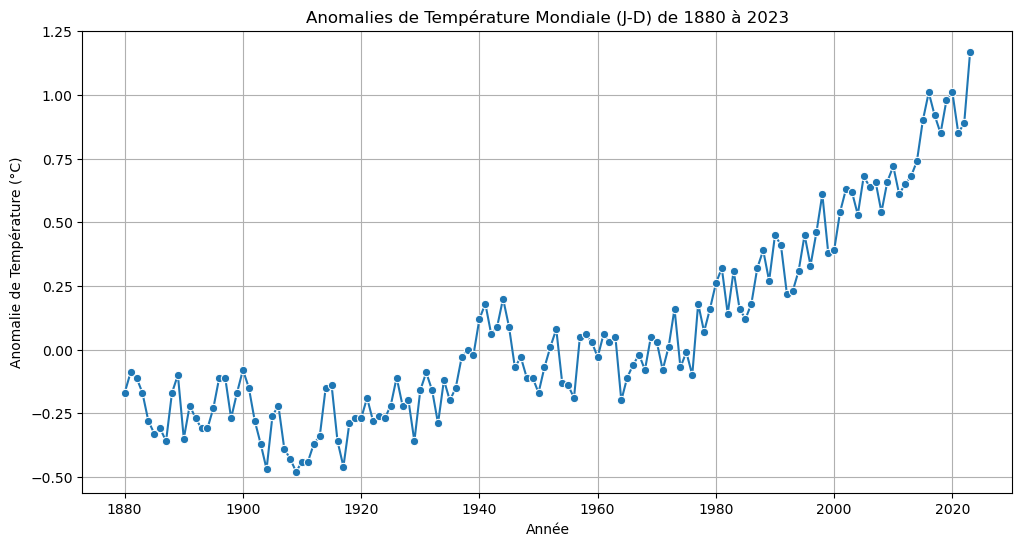

In [ ]:
# Visualisation des anomalies de température
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='J-D', data=df_temperature, marker='o')
plt.title('Anomalies de Température Mondiale (J-D) de 1880 à 2023')
plt.xlabel('Année')
plt.ylabel('Anomalie de Température (°C)')
plt.grid(True)
plt.show()

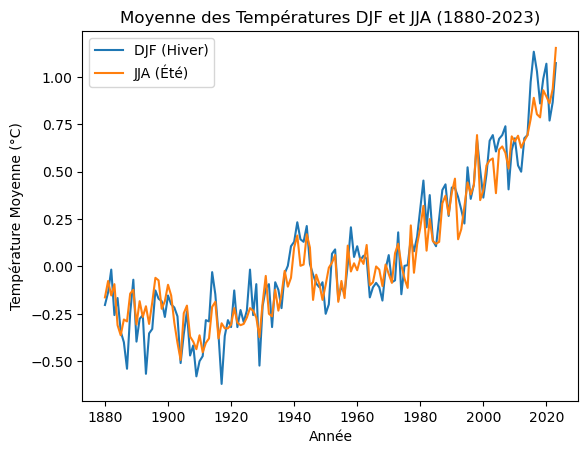

In [ ]:
df_temperature['Moy_DJF'] = df_temperature[['Dec', 'Jan', 'Feb']].mean(axis=1)
df_temperature['Moy_JJA'] = df_temperature[['Jun', 'Jul', 'Aug']].mean(axis=1)

# Tracer le graphique
plt.plot(df_temperature['Year'], df_temperature['Moy_DJF'], label='DJF (Hiver)')
plt.plot(df_temperature['Year'], df_temperature['Moy_JJA'], label='JJA (Été)')

plt.xlabel('Année')
plt.ylabel('Température Moyenne (°C)')
plt.title('Moyenne des Températures DJF et JJA (1880-2023)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_CO2 = pd.read_csv('CO2.csv')
df_CO2.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
valeurs_manquantes_par_colonne = df_CO2.isnull().sum()
print(valeurs_manquantes_par_colonne)

country                            0
year                               0
iso_code                        8341
population                      8563
gdp                            33494
                               ...  
temperature_change_from_n2o    10438
total_ghg                      41704
total_ghg_excluding_lucf       41704
trade_co2                      43660
trade_co2_share                43661
Length: 79, dtype: int64


In [ ]:
print(df_CO2.describe())

print(df_CO2.info())


               year    population           gdp    cement_co2  \
count  48058.000000  3.949500e+04  1.456400e+04  23764.000000   
mean    1926.842565  6.083223e+07  2.677586e+11      9.109400   
std       59.414846  3.285867e+08  2.103151e+12     66.463548   
min     1750.000000  2.220000e+02  4.998000e+07      0.000000   
25%     1883.000000  3.464375e+05  7.516679e+09      0.000000   
50%     1930.000000  2.456362e+06  2.597999e+10      0.029000   
75%     1976.000000  1.008038e+07  1.132942e+11      0.834000   
max     2022.000000  7.975105e+09  1.136302e+14   1692.404000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count           22017.000000  30308.000000    28157.000000     25136.000000   
mean                0.066798    391.272161        5.868310        20.055703   
std                 0.125367   1855.824655       59.845871       687.366449   
min                 0.000000      0.000000    -2032.366000      -100.000000   
25%                

In [ ]:
print(df_CO2.nunique())

country                          264
year                             273
iso_code                         219
population                     38796
gdp                            14561
                               ...  
temperature_change_from_n2o       79
total_ghg                       4876
total_ghg_excluding_lucf        4657
trade_co2                       4029
trade_co2_share                 4192
Length: 79, dtype: int64


In [ ]:

df_CO2[num_data] = df_CO2[num_data].fillna(df_CO2[num_data].mean())
4

5
# Vérifier s'il reste des valeurs manquantes
6
print(df_CO2.isnull().sum())



country                            0
year                               0
iso_code                        8341
population                      8563
gdp                            33494
                               ...  
temperature_change_from_n2o    10438
total_ghg                      41704
total_ghg_excluding_lucf       41704
trade_co2                      43660
trade_co2_share                43661
Length: 79, dtype: int64


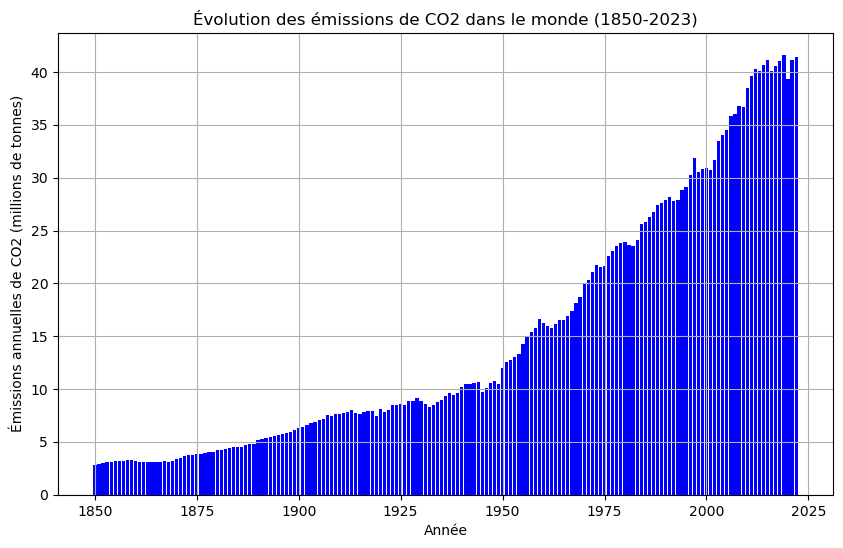

In [ ]:
df_world = df_CO2[df_CO2["country"] == "World"]

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.bar(df_world["year"], df_world["co2_including_luc"] / 1000, color='blue')  # Conversion en millions de tonnes
plt.title("Évolution des émissions de CO2 dans le monde (1850-2023)")
plt.xlabel("Année")
plt.ylabel("Émissions annuelles de CO2 (millions de tonnes)")
plt.grid(True)
plt.show()

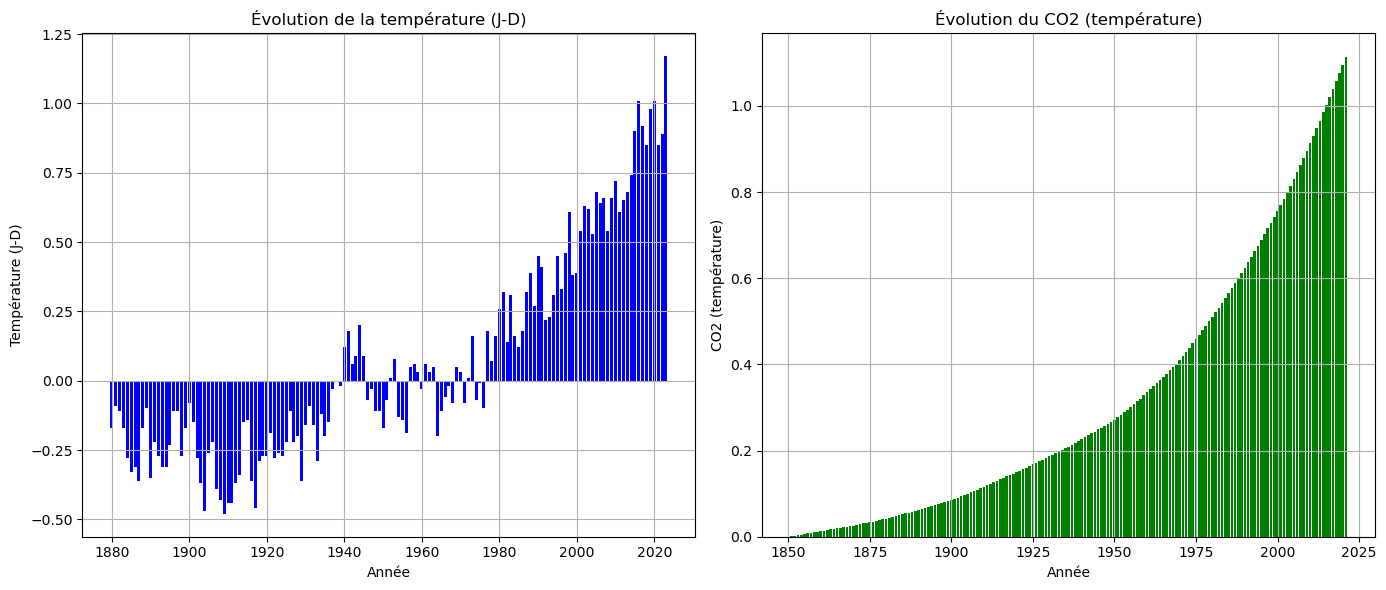

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données de température et de CO2
# Assurez-vous que vos données sont stockées dans des DataFrames pandas avec les colonnes appropriées
# Supposons que les données de température sont dans un DataFrame appelé df_temperature
# Supposons également que les données de CO2 sont dans un DataFrame appelé df_CO2

# Exemple de chargement des données fictives
df_temperature = pd.read_csv("temperature_mondiale.csv")
df_CO2 = pd.read_csv("CO2.csv")

# Sélectionner les données pour les années entre 1850 et 2023
df_temperature = df_temperature[(df_temperature["Year"] >= 1850) & (df_temperature["Year"] <= 2023)]
df_CO2 = df_CO2[(df_CO2["year"] >= 1850) & (df_CO2["year"] <= 2023)]

# Filtrer les données de CO2 pour la ligne "world"
df_CO2_world = df_CO2[df_CO2["country"] == "World"]

# Créer une figure et des axes pour les sous-graphiques
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Tracer l'évolution de la température (colonne J-D)
axes[0].bar(df_temperature["Year"], df_temperature["J-D"], color='blue', label='Température (J-D)')
axes[0].set_title("Évolution de la température (J-D)")
axes[0].set_xlabel("Année")
axes[0].set_ylabel("Température (J-D)")
axes[0].grid(True)

# Tracer l'évolution du CO2 pour la ligne "world" et la colonne temperature_change_from_co2
axes[1].bar(df_CO2_world["year"], df_CO2_world["temperature_change_from_co2"], color='green', label='CO2 (température)')
axes[1].set_title("Évolution du CO2 (température)")
axes[1].set_xlabel("Année")
axes[1].set_ylabel("CO2 (température)")
axes[1].grid(True)

# Ajuster la disposition des sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

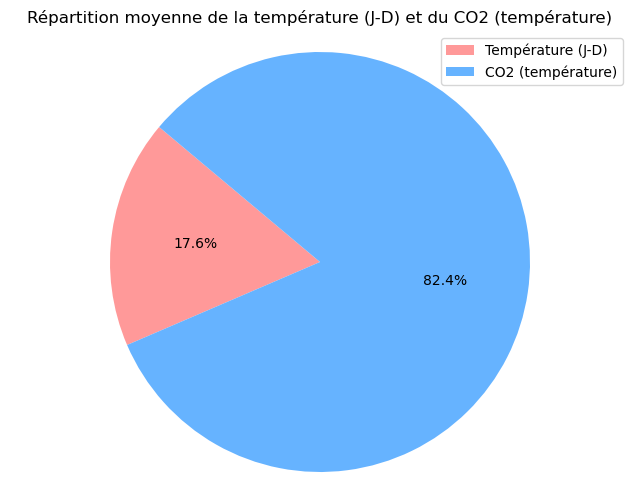

In [ ]:

df_temperature = pd.read_csv("temperature_mondiale.csv")
df_CO2 = pd.read_csv("CO2.csv")

df_temperature = df_temperature[(df_temperature["Year"] >= 1850) & (df_temperature["Year"] <= 2023)]
df_CO2 = df_CO2[(df_CO2["year"] >= 1850) & (df_CO2["year"] <= 2023)]

# Filtrer les données de CO2 pour la ligne "world"
df_CO2_world = df_CO2[df_CO2["country"] == "World"]

# Créer un tableau de données combinant l'évolution de la température (colonne J-D) et du CO2 (température)
df_combined = pd.DataFrame({
    'Year': df_temperature['Year'],
    'Temperature (J-D)': df_temperature['J-D'],
    'CO2 (température)': df_CO2_world['temperature_change_from_co2']
})

# Calculer les moyennes pour chaque série
mean_temperature = df_combined['Temperature (J-D)'].mean()
mean_CO2 = df_combined['CO2 (température)'].mean()

# Créer un graphique à secteurs (camembert)
labels = ['Température (J-D)', 'CO2 (température)']
sizes = [mean_temperature, mean_CO2]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 6))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Répartition moyenne de la température (J-D) et du CO2 (température)")

plt.legend(labels, loc='best')
plt.axis('equal')
plt.show()

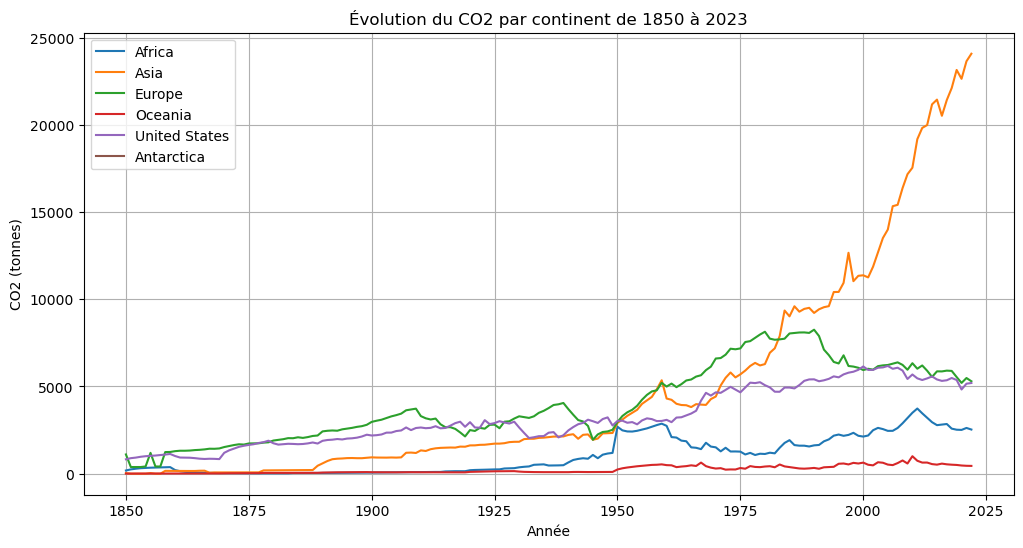

In [ ]:
df_CO2 = pd.read_csv("CO2.csv")

# Sélectionner les lignes pour les continents spécifiés
continents = ['Africa', 'Asia', 'Europe', 'Oceania', 'United States', 'Antarctica']
df_CO2_continents = df_CO2[df_CO2['country'].isin(continents)]

# Plot
plt.figure(figsize=(12, 6))

# Parcourir chaque continent et tracer son évolution du CO2
for continent in continents:
    df_continent = df_CO2_continents[df_CO2_continents['country'] == continent]
    plt.plot(df_continent['year'], df_continent['co2_including_luc'], label=continent)

plt.xlabel('Année')
plt.ylabel('CO2 (tonnes)')
plt.title("Évolution du CO2 par continent de 1850 à 2023")
plt.legend()
plt.grid(True)
plt.show()

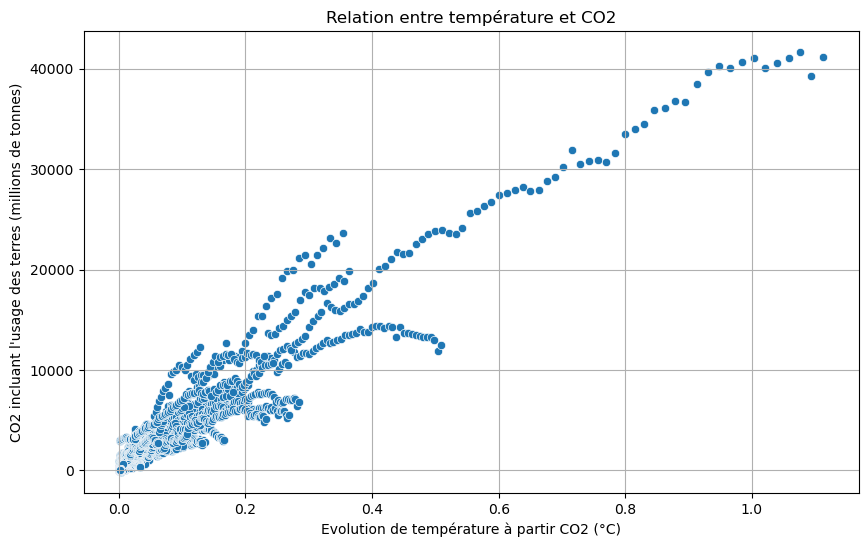

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_CO2, x='temperature_change_from_co2', y='co2_including_luc')
plt.title("Relation entre température et CO2")
plt.xlabel("Evolution de température à partir CO2 (°C)")
plt.ylabel("CO2 incluant l'usage des terres (millions de tonnes)")
plt.grid(True)
plt.show()